<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Minimum_Spanning_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Spanning Tree (MST)
A Minimum Spanning Tree (MST) is a subset of the edges in a connected, undirected graph that connects all the vertices together without any cycles and with the minimum possible total edge weight.

### Explanation of MST:
- **Connected Graph**: A graph where there is a path between every pair of vertices.
- **Spanning Tree**: A subgraph that includes all vertices of the original graph and is a tree (i.e., connected and acyclic).
- **Minimum**: Among all possible spanning trees, the one with the smallest sum of edge weights.

### Key Properties of MSTs:
1. **Uniqueness**: If all the edge weights are distinct, then there will be only one unique MST.
2. **Spanning**: An MST spans all the vertices of the graph.
3. **Minimal Total Weight**: The sum of the weights of all the edges in the MST is minimized.

### MST Algorithms:
Two well-known algorithms to find the Minimum Spanning Tree of a graph are Prim's Algorithm and Kruskal's Algorithm.

---

Create a simple weighted graph using NetworkX and plot it using Matplotlib:

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
# Create a weighted graph
G = nx.Graph()

In [29]:
edges = [('A', 'B', 4), ('A', 'H', 8), ('B', 'H', 11), ('B', 'C', 8),
         ('H', 'G', 1), ('H', 'I', 7), ('G', 'F', 2), ('I', 'C', 2),
         ('I', 'G', 6), ('C', 'F', 4), ('C', 'D', 7), ('D', 'F', 14),
         ('D', 'E', 9), ('F', 'E', 10)]
# Add edges to the graph
G.add_weighted_edges_from(edges)

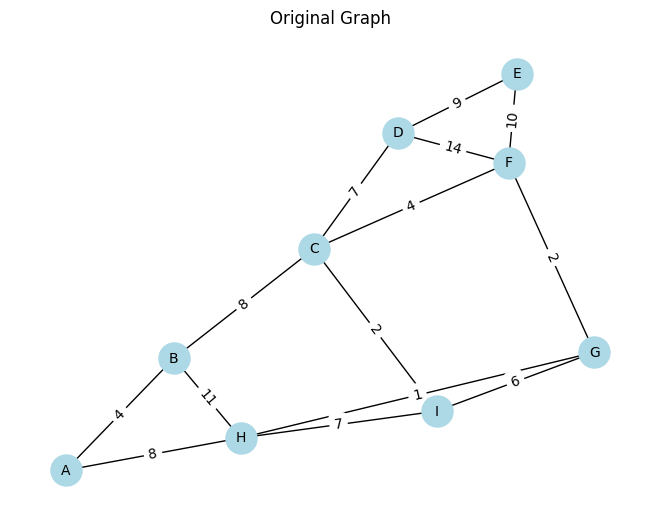

In [30]:
# Draw the graph with edge labels
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Original Graph")
plt.show()

Let's implement Kruskal’s algorithm to find the Minimum Spanning Tree (MST) for the Muddy City Problem step by step.

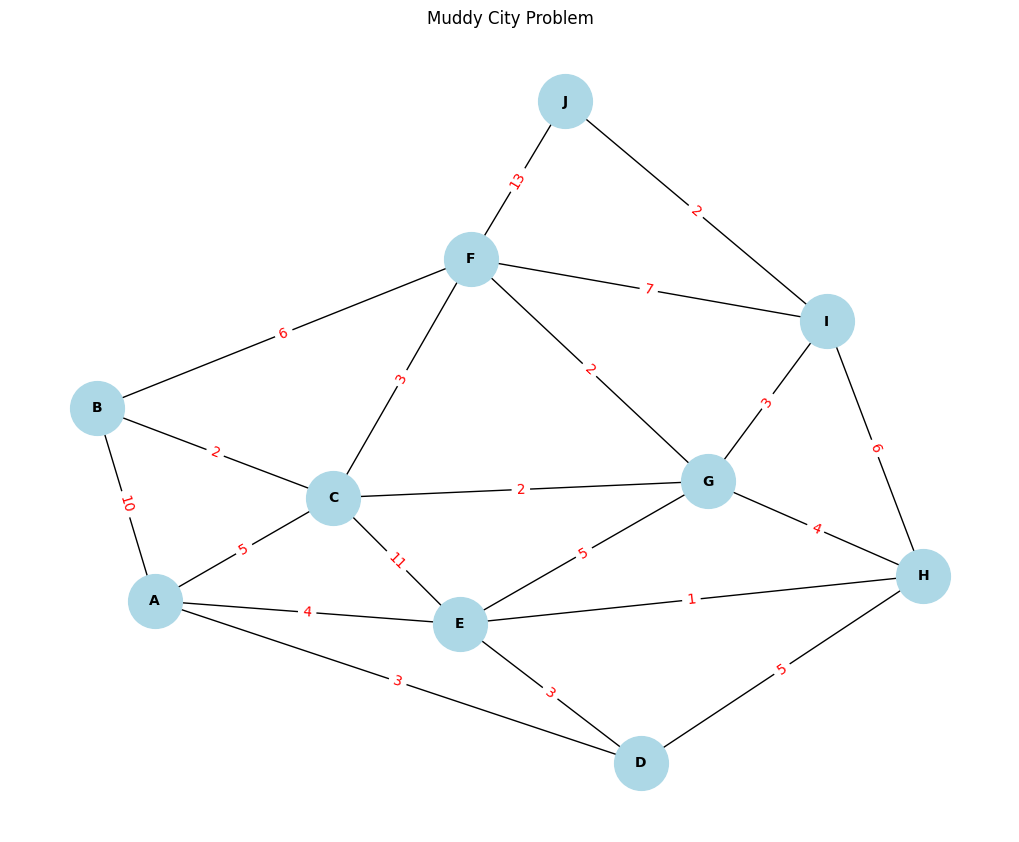

In [41]:
# Create a graph
G = nx.Graph()

# Add edges with weights specified
edges = [
    ('A', 'B', 10), ('A', 'C', 5), ('A', 'D', 3), ('A', 'E', 4),
    ('B', 'C', 2), ('B', 'F', 6), ('C', 'E', 11), ('C', 'F', 3),
    ('C', 'G', 2), ('D', 'E', 3), ('D', 'H', 5), ('E', 'H', 1), ('E', 'G', 5),
    ('F', 'G', 2), ('F', 'J', 13), ('F', 'I', 7), ('G', 'I', 3), ('G', 'H', 4),
    ('H', 'I', 6), ('I', 'J', 2)
]

# Add nodes and edges to the graph
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visual representation
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, font_weight="bold")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')


plt.title('Muddy City Problem')
plt.show()

Step 0: This is the original graph. The numbers near the edges represent
edge weights, and no edges have been added to the MST yet

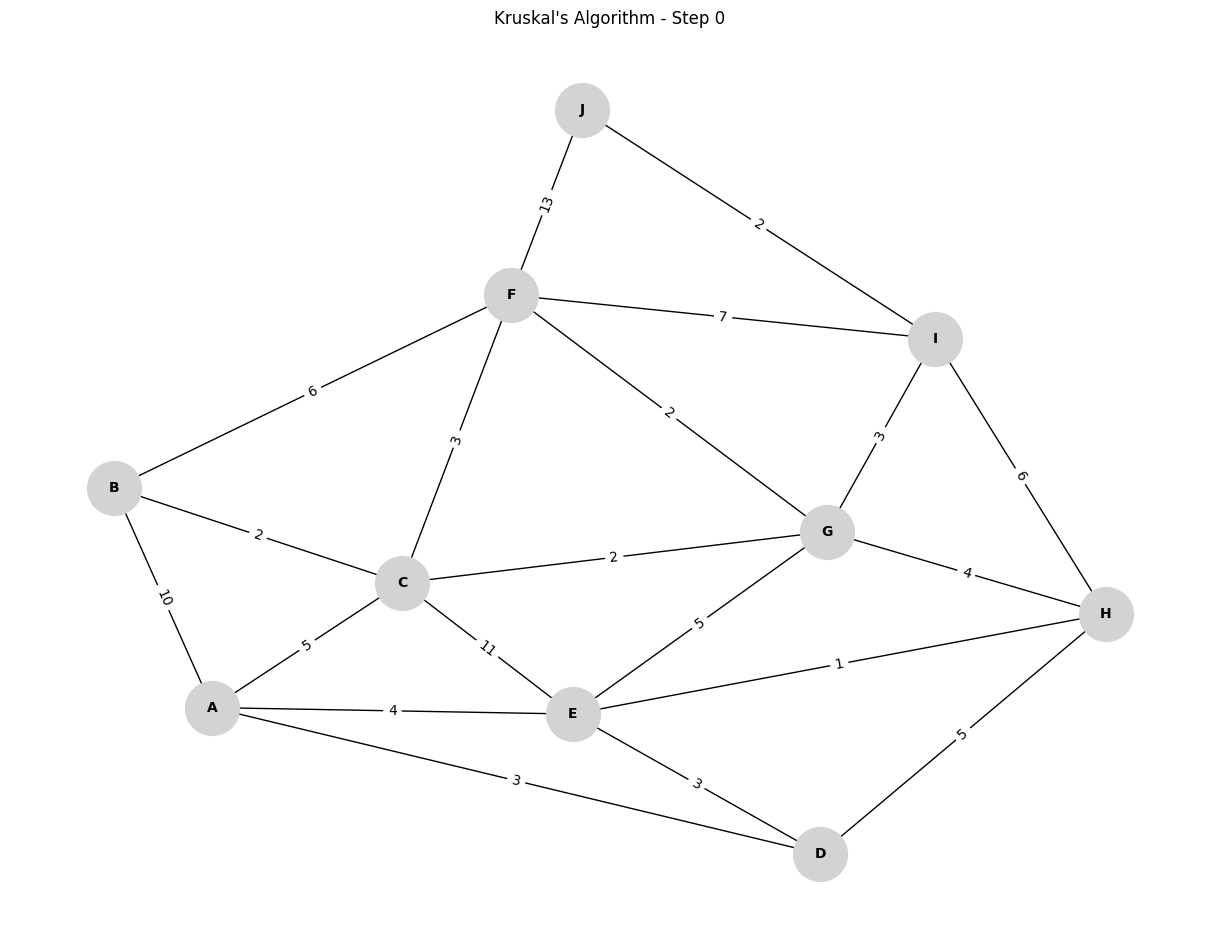

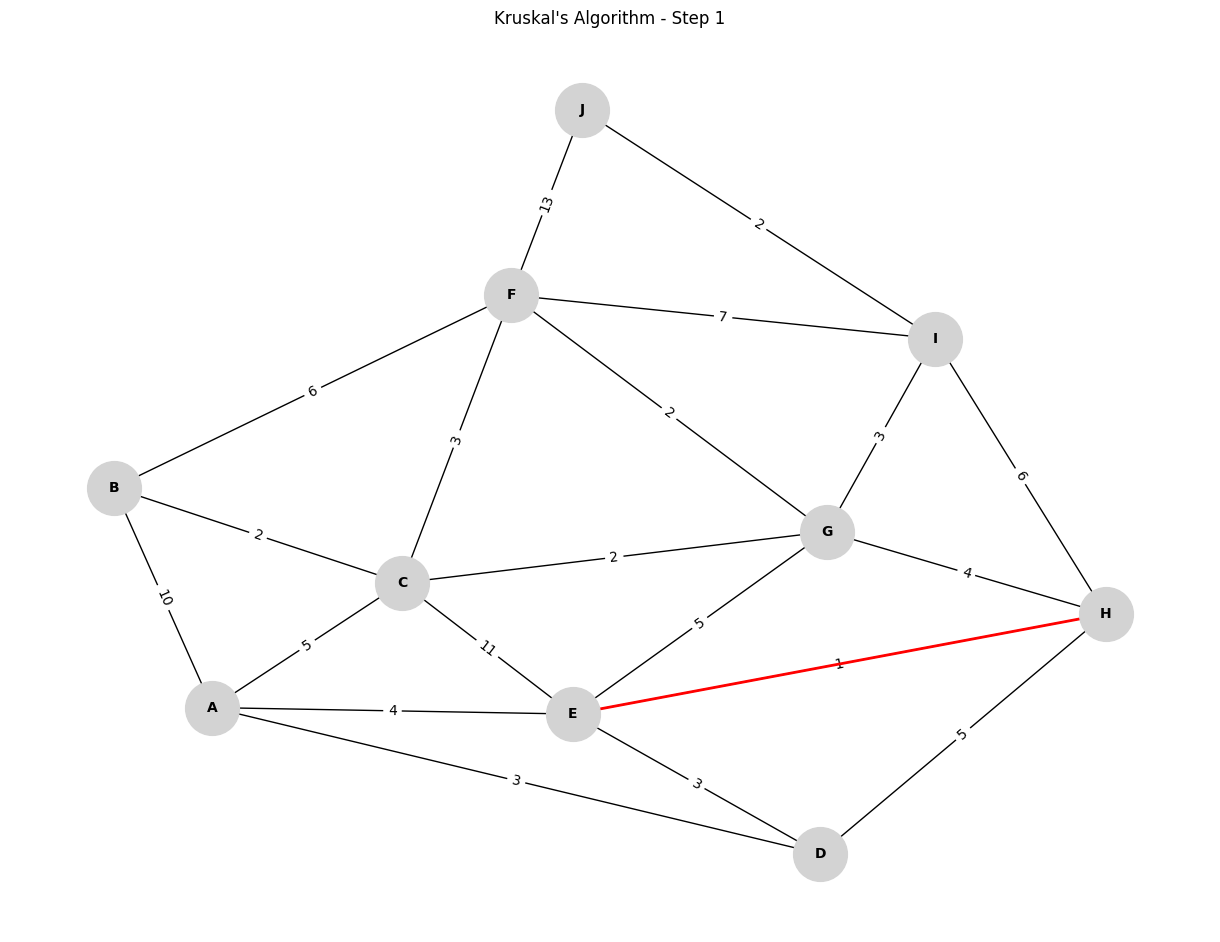

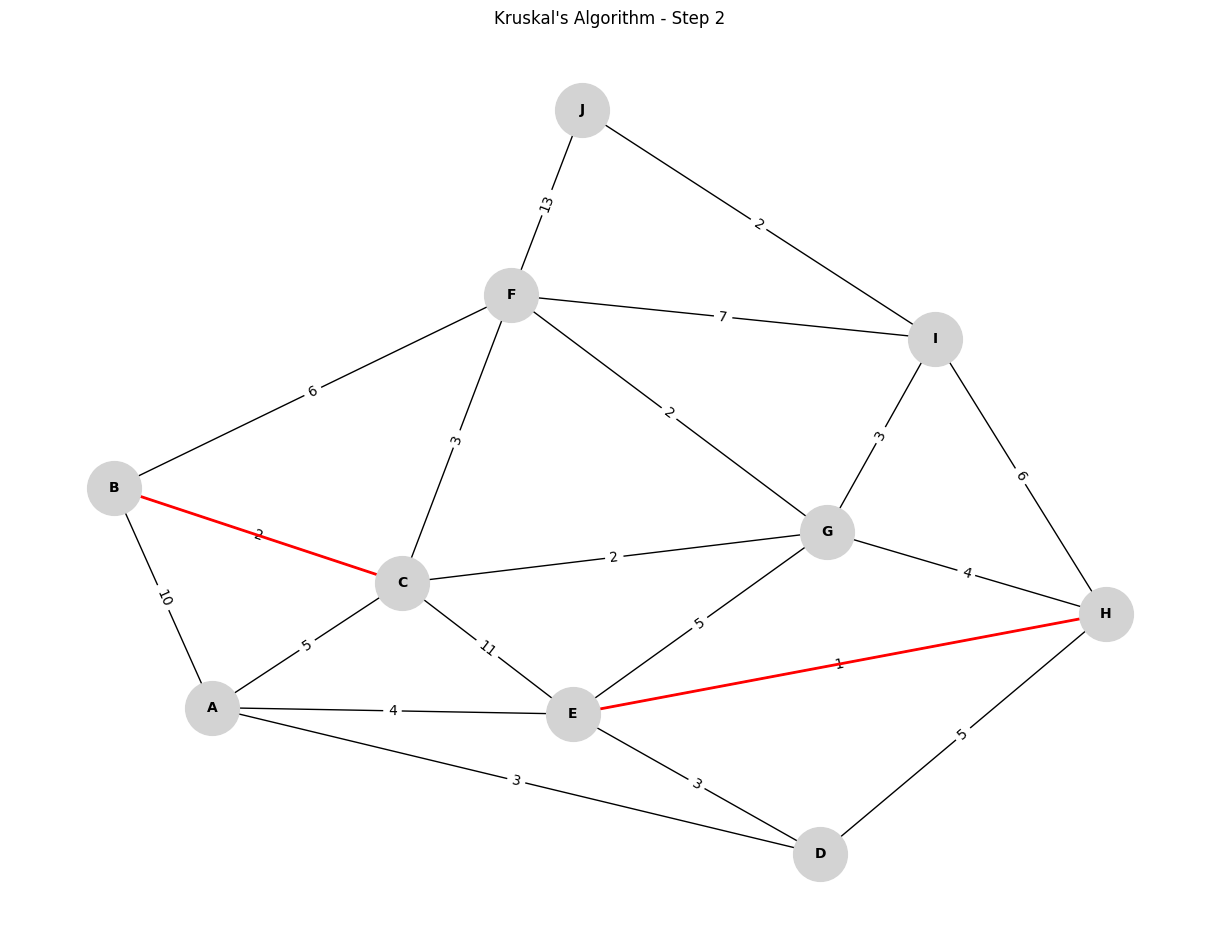

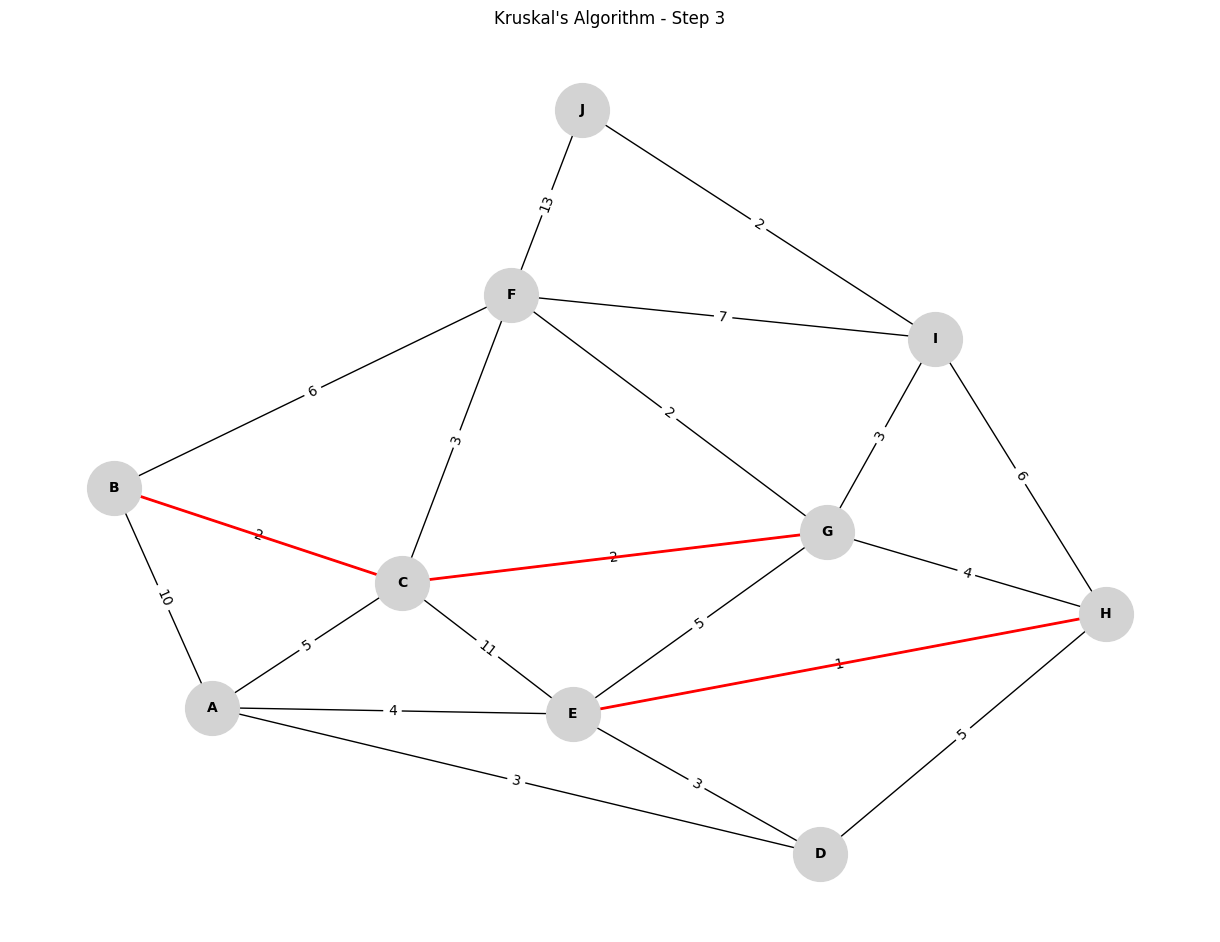

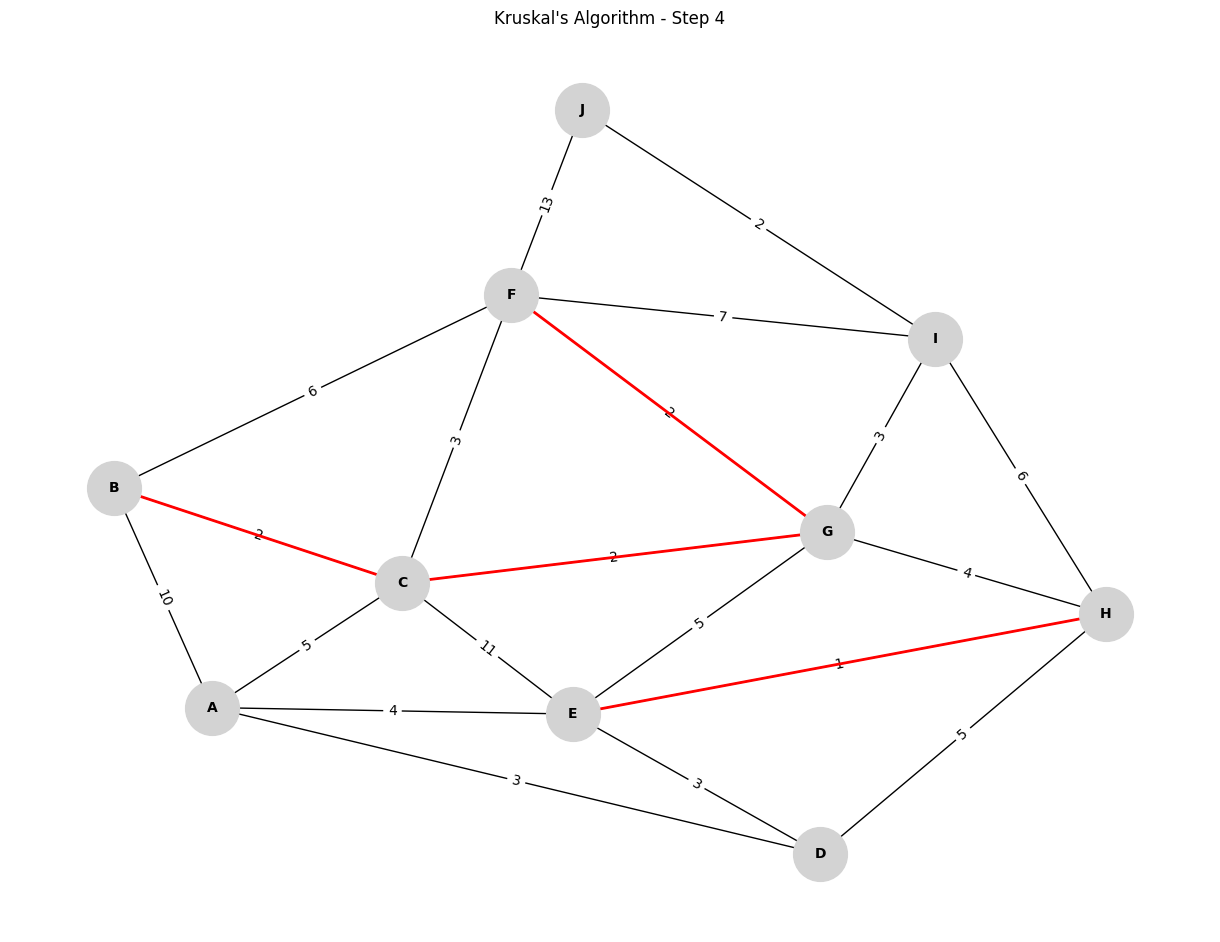

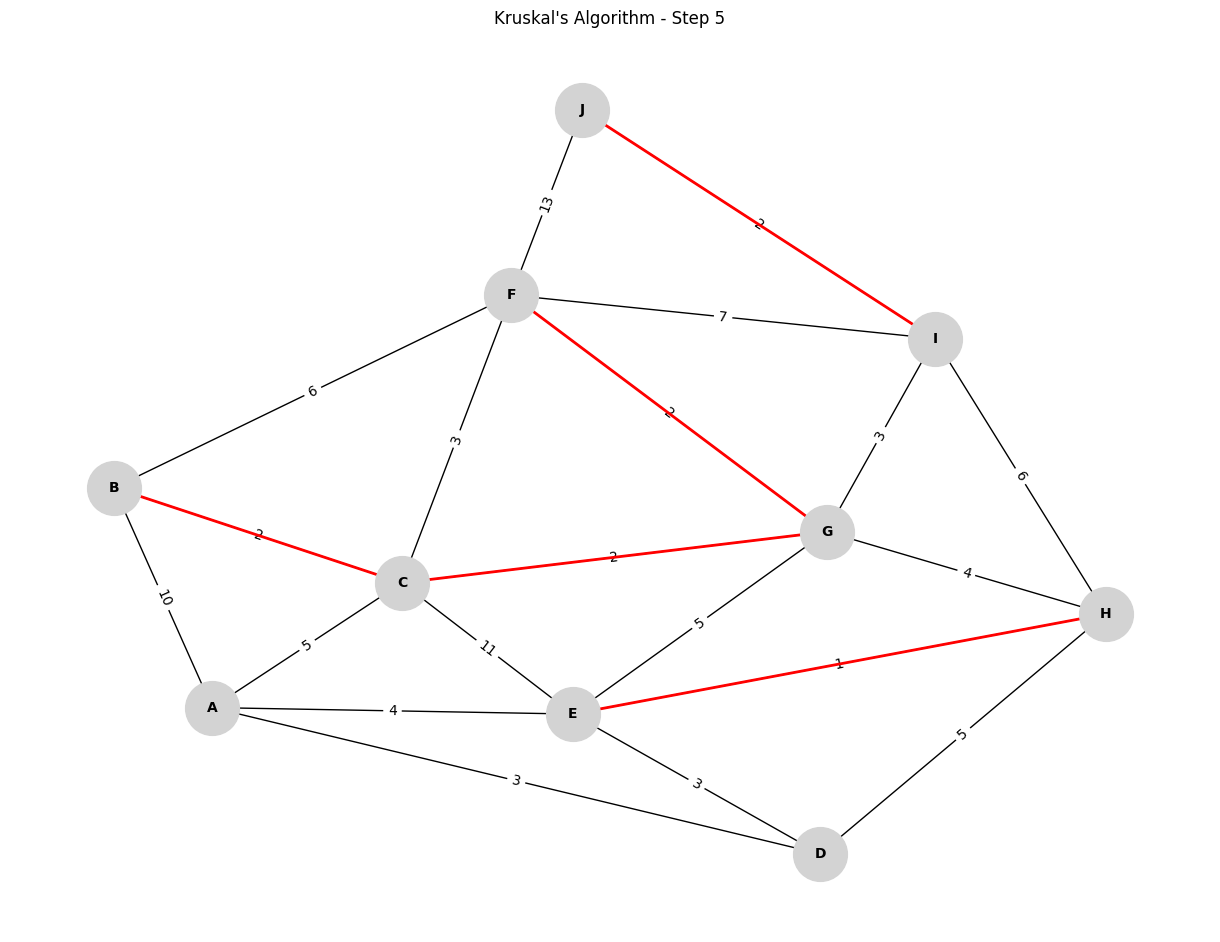

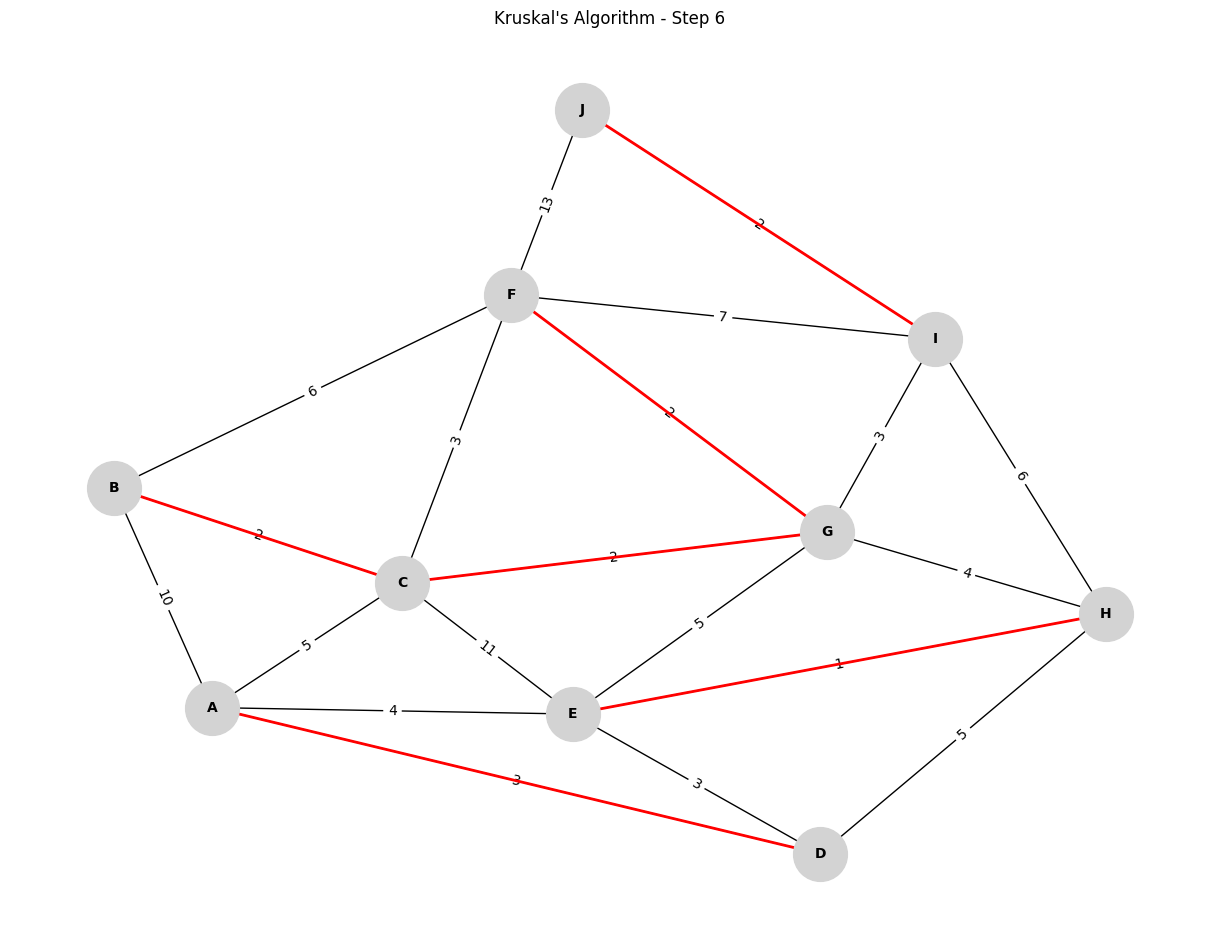

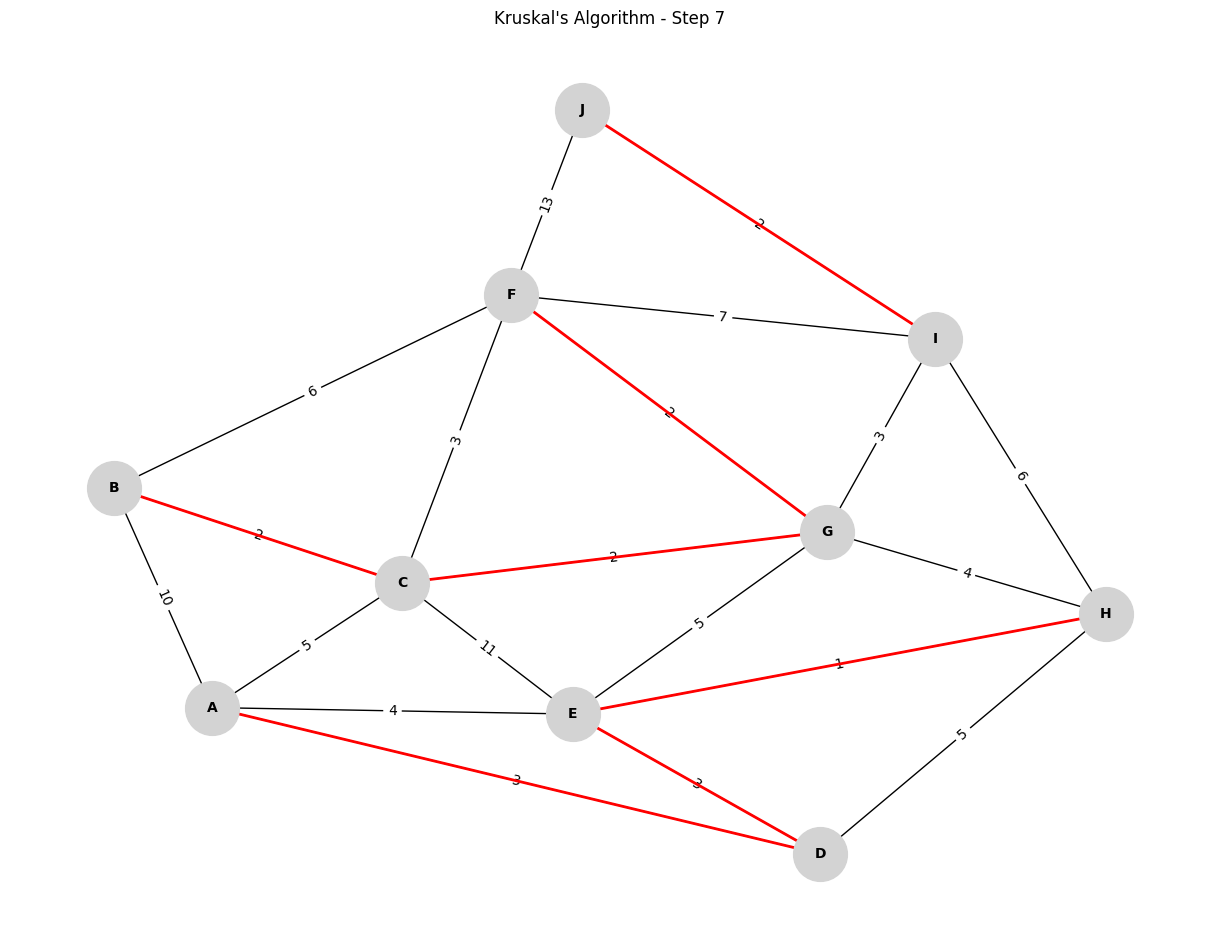

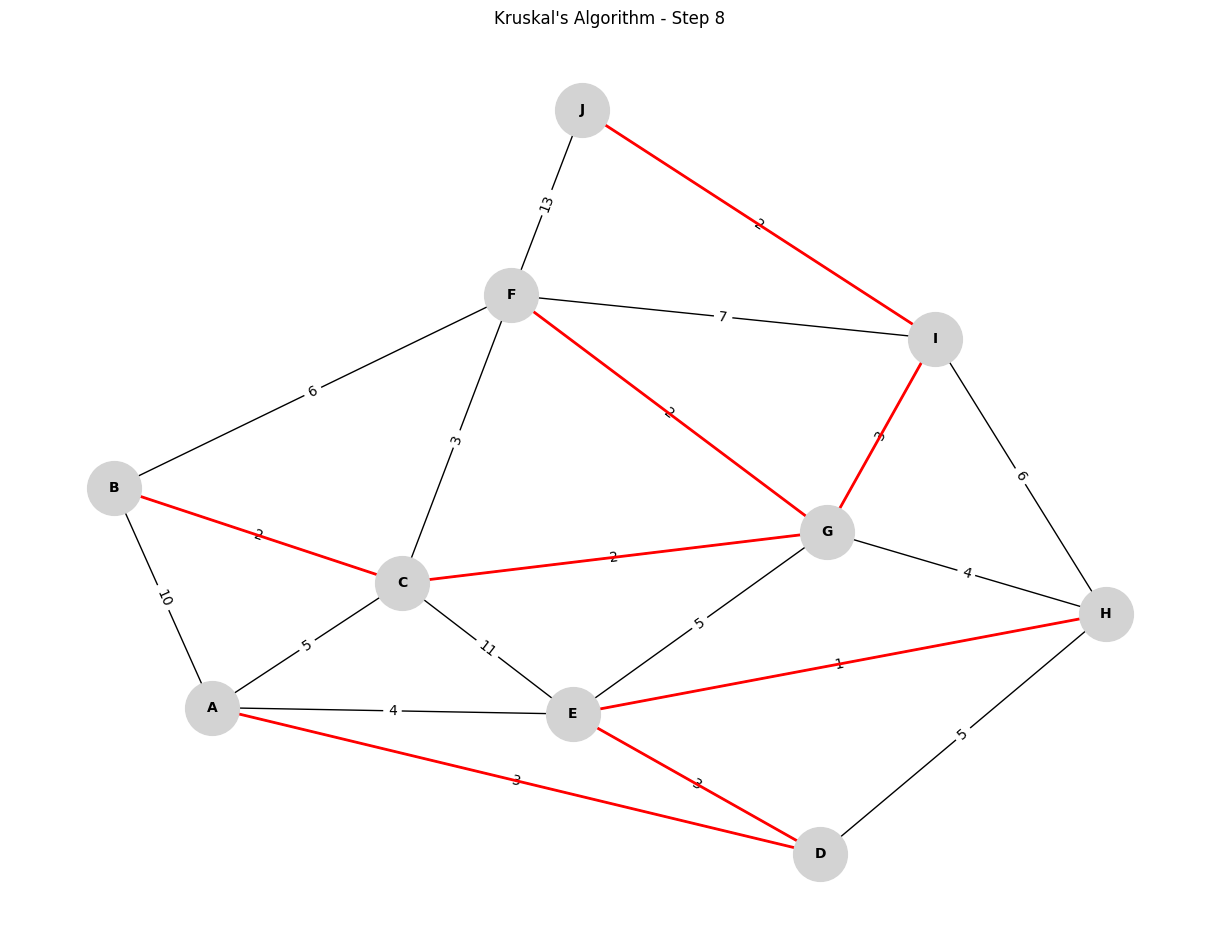

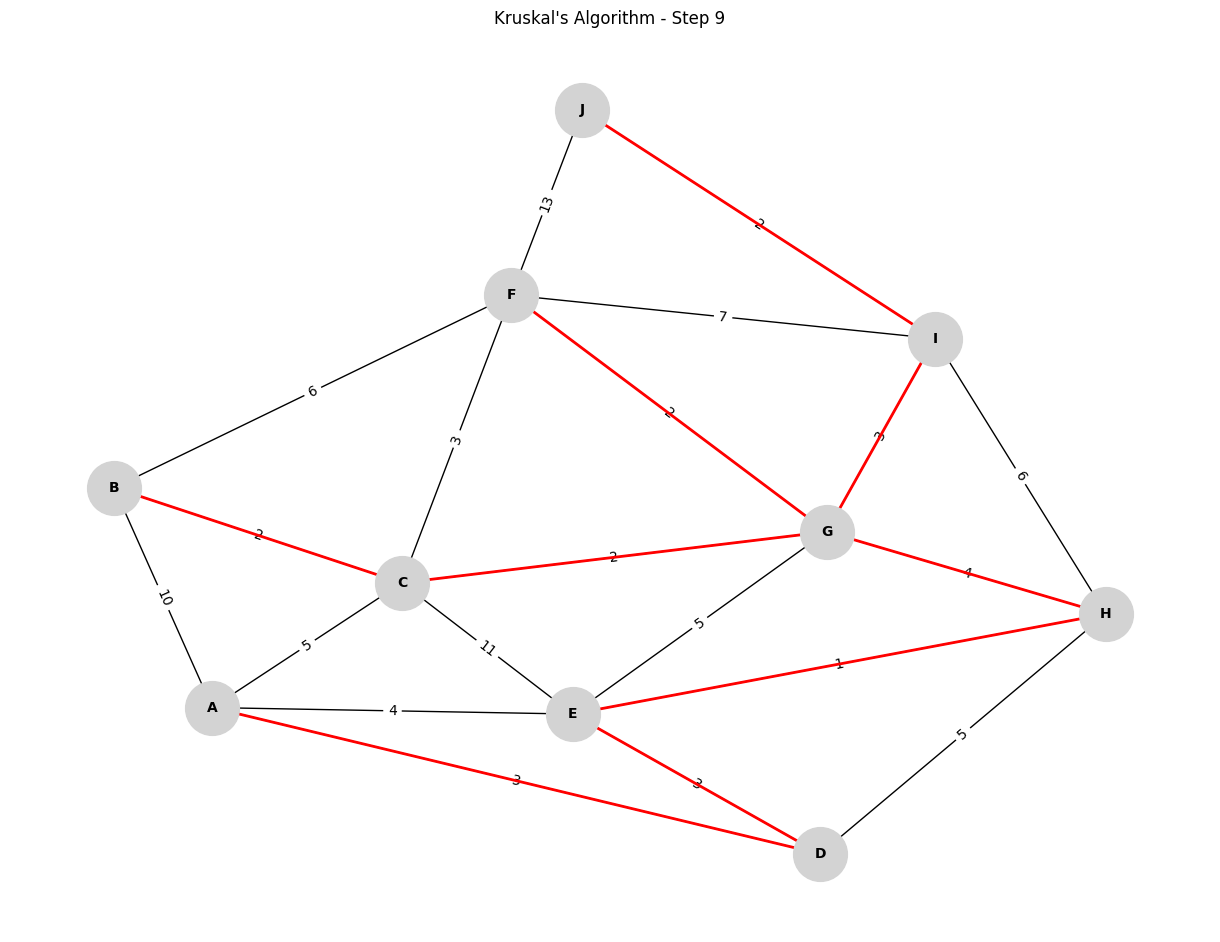

In [42]:
# Layout for visual representation
pos = nx.spring_layout(G)

def draw_graph(G, pos, highlighted_edges=None, step=None):
    plt.figure(figsize=(12, 9))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightgrey", font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if highlighted_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, width=2, edge_color='r')
    if step is not None:
        plt.title(f'Kruskal\'s Algorithm - Step {step}')
    plt.show()

# Step 0: Original Graph
draw_graph(G, pos, step=0)

# Kruskal's Algorithm Implementation
def kruskal_step_by_step(G):
    # Sort edges by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    parent = {}
    rank = {}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    # Initialize disjoint sets
    for node in G.nodes():
        parent[node] = node
        rank[node] = 0

    mst = []
    step = 1

    for edge in sorted_edges:
        u, v, data = edge
        if find(u) != find(v):
            mst.append((u, v))
            union(u, v)
            draw_graph(G, pos, highlighted_edges=mst, step=step)
            step += 1
        if len(mst) == len(G.nodes()) - 1:
            break

kruskal_step_by_step(G)